In [3]:
pip install pandas


In [4]:
pip install numpy


In [5]:
pip install spacy


In [7]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
pip install nltk


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
pip install textblob


In [11]:
pip install scikit-learn


In [12]:
pip install matplotlib


In [13]:
pip install seaborn


In [17]:
import pandas as pd

# Load datasets
politifact_real = pd.read_csv('politifact_real.csv')
politifact_fake = pd.read_csv('politifact_fake.csv')
gossipcop_real = pd.read_csv('gossipcop_real.csv')
gossipcop_fake = pd.read_csv('gossipcop_fake.csv')

# Inspect columns and first few rows
print("Politifact Real Columns:")
print(politifact_real.columns)
print(politifact_real.head(), "\n")

print("Politifact Fake Columns:")
print(politifact_fake.columns)
print(politifact_fake.head(), "\n")

print("GossipCop Real Columns:")
print(gossipcop_real.columns)
print(gossipcop_real.head(), "\n")

print("GossipCop Fake Columns:")
print(gossipcop_fake.columns)
print(gossipcop_fake.head(), "\n")


Politifact Real Columns:
Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')
                id                                           news_url  \
0  politifact14984                          http://www.nfib-sbet.org/   
1  politifact12944  http://www.cq.com/doc/newsmakertranscripts-494...   
2    politifact333  https://web.archive.org/web/20080204072132/htt...   
3   politifact4358  https://web.archive.org/web/20110811143753/htt...   
4    politifact779  https://web.archive.org/web/20070820164107/htt...   

                                               title  \
0        National Federation of Independent Business   
1                        comments in Fayetteville NC   
2  Romney makes pitch, hoping to close deal : Ele...   
3  Democratic Leaders Say House Democrats Are Uni...   
4    Budget of the United States Government, FY 2008   

                                           tweet_ids  
0  967132259869487105\t967164368768196609\t967215...  
1  942953459\t8980098198\

In [27]:
import pandas as pd

# Load datasets
politifact_real = pd.read_csv('politifact_real.csv')
politifact_fake = pd.read_csv('politifact_fake.csv')
gossipcop_real = pd.read_csv('gossipcop_real.csv')
gossipcop_fake = pd.read_csv('gossipcop_fake.csv')

# Add labels
politifact_real['label'] = 1
politifact_fake['label'] = 0
gossipcop_real['label'] = 1
gossipcop_fake['label'] = 0

# Combine datasets
data = pd.concat([politifact_real, politifact_fake, gossipcop_real, gossipcop_fake])

# Drop rows with missing titles
data = data.dropna(subset=['title'])

print("Combined Dataset Sample:")
print(data[['id', 'title', 'label']].head())

# Calculate popularity based on the number of tweet IDs
data['tweet_count'] = data['tweet_ids'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

print("Tweet count added as a popularity metric.")
print(data[['title', 'tweet_count', 'label']].head())



Combined Dataset Sample:
                id                                              title  label
0  politifact14984        National Federation of Independent Business      1
1  politifact12944                        comments in Fayetteville NC      1
2    politifact333  Romney makes pitch, hoping to close deal : Ele...      1
3   politifact4358  Democratic Leaders Say House Democrats Are Uni...      1
4    politifact779    Budget of the United States Government, FY 2008      1
Tweet count added as a popularity metric.
                                               title  tweet_count  label
0        National Federation of Independent Business            1      1
1                        comments in Fayetteville NC            1      1
2  Romney makes pitch, hoping to close deal : Ele...            0      1
3  Democratic Leaders Say House Democrats Are Uni...            0      1
4    Budget of the United States Government, FY 2008            1      1


In [28]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Preprocess the title column
data['cleaned_title'] = data['title'].apply(preprocess_text)

print("Text preprocessing completed.")
data[['title', 'cleaned_title', 'label']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Text preprocessing completed.


,title,cleaned_title,label
0,National Federation of Independent Business,national federation independent business,1
1,comments in Fayetteville NC,comments fayetteville nc,1
2,"Romney makes pitch, hoping to close deal : Ele...",romney makes pitch hoping close deal elections...,1
3,Democratic Leaders Say House Democrats Are Uni...,democratic leaders say house democrats united ...,1
4,"Budget of the United States Government, FY 2008",budget united states government fy,1


Named Entity Recognition completed.


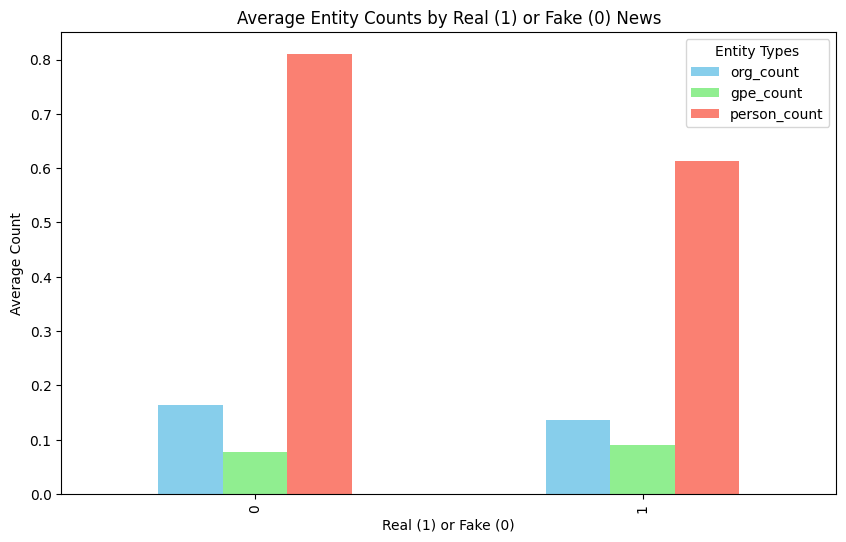

In [33]:
import spacy
import pandas as pd


# Load SpaCy language model
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entity_counts = {'ORG': 0, 'GPE': 0, 'PERSON': 0}
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
    return entity_counts

# Extract entity counts
data['entities'] = data['cleaned_title'].apply(extract_entities)
data['org_count'] = data['entities'].apply(lambda x: x['ORG'])
data['gpe_count'] = data['entities'].apply(lambda x: x['GPE'])
data['person_count'] = data['entities'].apply(lambda x: x['PERSON'])

print("Named Entity Recognition completed.")
#data[['cleaned_title', 'org_count', 'gpe_count', 'person_count']].head()  # Optional: Display results

# Average entity counts by real/fake news
entity_means = data.groupby('label')[['org_count', 'gpe_count', 'person_count']].mean()

# Plot entity counts
entity_means.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Average Entity Counts by Real (1) or Fake (0) News")
plt.xlabel("Real (1) or Fake (0)")
plt.ylabel("Average Count")
plt.legend(title="Entity Types")
plt.show()


In [35]:
from textblob import TextBlob

# Calculate additional features
data['title_length'] = data['cleaned_title'].apply(lambda x: len(x.split()))
data['sentiment'] = data['cleaned_title'].apply(lambda x: TextBlob(x).sentiment.polarity)

print("Feature engineering completed.")
data[['title_length', 'sentiment', 'label']].head()


Feature engineering completed.


,title_length,sentiment,label
0,4,0.0,1
1,3,0.0,1
2,10,0.0,1
3,9,0.0,1
4,5,0.0,1


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and labels
features = data[['org_count', 'gpe_count', 'person_count', 'title_length', 'sentiment']]
labels = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7272596637447909
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.09      0.14      1730
           1       0.76      0.94      0.84      5229

    accuracy                           0.73      6959
   macro avg       0.54      0.51      0.49      6959
weighted avg       0.65      0.73      0.66      6959



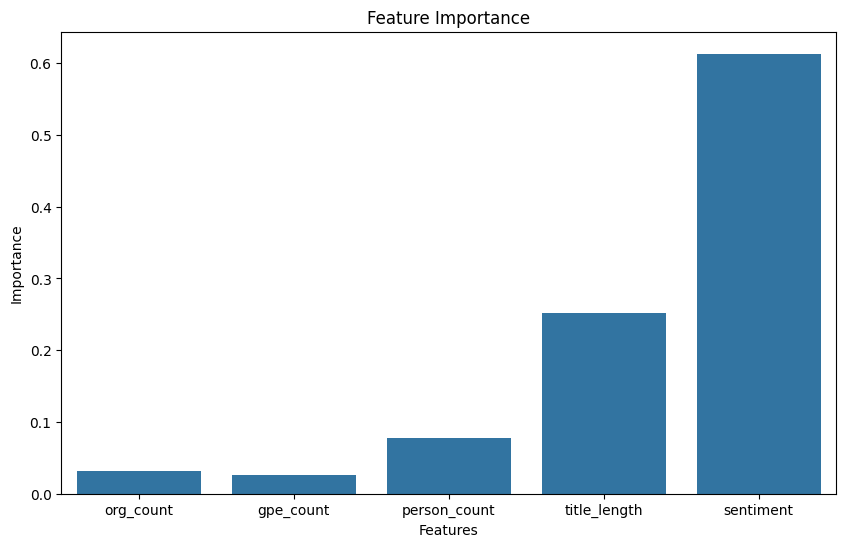

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=features.columns, y=model.feature_importances_)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


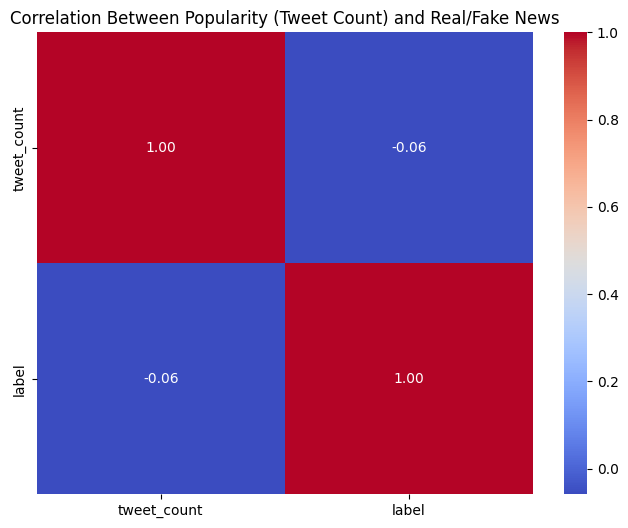

In [38]:


# Select columns for correlation analysis
correlation_data = data[['tweet_count', 'label']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Popularity (Tweet Count) and Real/Fake News")
plt.show()


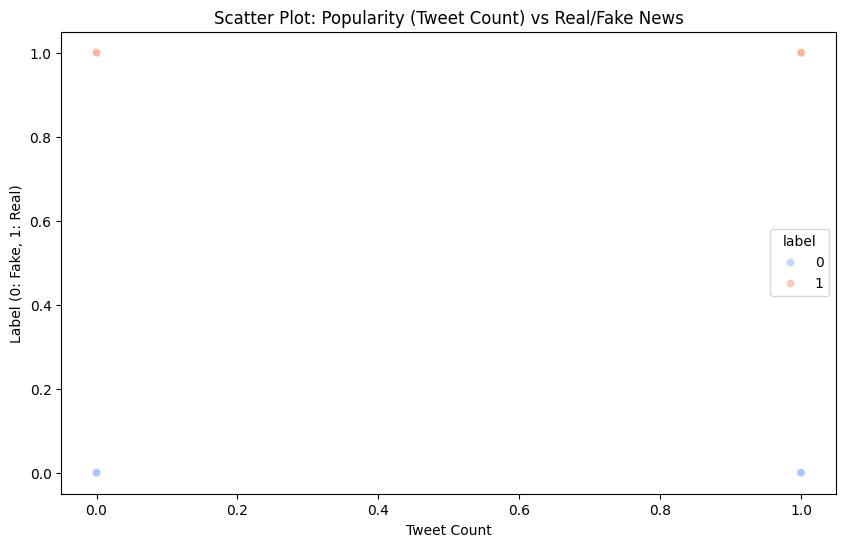

In [39]:
# Scatter plot for tweet count (popularity) vs label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tweet_count', y='label', hue='label', palette='coolwarm', alpha=0.7)
plt.title("Scatter Plot: Popularity (Tweet Count) vs Real/Fake News")
plt.xlabel("Tweet Count")
plt.ylabel("Label (0: Fake, 1: Real)")
plt.show()
